In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

In [61]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [62]:
# Scaling the data to be between 0 and 1 (255 is the max value of a pixel)
X_train = X_train / 255
X_test = X_test / 255

In [63]:
X_train.shape

(60000, 28, 28)

In [64]:
X_train[0].shape

(28, 28)

In [65]:
X_train[0][0].shape

(28,)

- 60k datapoints/images
- Each image/datapoint is a matrix of 28 by 28 pixels 
- This is modeled as a list that have another 28 lists inside, representing the rows and then each of these rows/lists have another 28 items inside representing all the columns 

- Remember that a Neural Network will receive an image to then classify it, but a NN does not receive a 28x28 matrix, it receives a flattened matrix, that means all pixels in one column (like a big base vector with many axis)

- So we need to flattened the whole thing to then train the model and use it

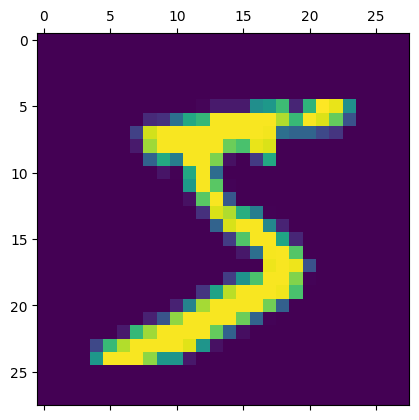

In [66]:
plt.matshow(X_train[0])

In [67]:
y_train[0]

np.uint8(5)

- Clearly is a 5 and then y_train have the output of the classification which is 5

### FLATTENING THE IMAGES FOR INPUT IN NN

In [68]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [69]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [70]:
X_train_flattened[0].shape

(784,)

In [71]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

- The reshape function takes a certain matrix and transform it to any possible matrix you want 
- In this case we transform the matrix that holds all the images, kept the same amount of images, the same amount of items inside the matrix (list), but change each of the elements/items inside this matrix (the images)
- We took each image/element of the matrix, which is another matrix of 28x28 and we flattened this to have only one column instead of 28 and put everything that was inside each of the rows of each column into a flattened one (each element have a list with 28 elements/pixels, so we took out this on each one)
- That means, then if we take 28 stuff out of 28 stuffs, thats a flattened array of 28*28 stuffs = 784 elements for the NN to work on 

- The NN will takes this 784 elements and classify the image based on that (output layer), but there could be as well hidden layers that will work as filters to help the output layers decide

### Modeling the Layers of our NN

In [72]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

/Users/armindomatias/.pyenv/versions/rehab_houses/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Here we are modeling our NN, defining the layers

- So, here we say that the NN will have 10 possible output layers (numbers from 0 to 9)

- Also that the input of the NN will be 784x1 flattened matrix -> a vector, not a matrix -> NN expects vectors not matrixs

- We are not defining Hidden Layers (stps to filter from input layers to output layers)

- And by saying a Dense Layer, we are saying that all Layers in the NN are connected to each other, that means, all of the 784 layers are connected to all of the 10 output layers

In [73]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Compile -> Is just add necessary Hyperparameters for the model 

- OPTIMIZER: choose an optimizer from some available to optimize the minimization of the loss function 
- LOSS: choose the loss function you want to minimize with the optimizer -> depends on the case -> look into the loss functions available to choose 
- METRICS: is the metric you want to maximize the model for, in this case we choose accuracy bc is the thing we are saying the model is what we value the most, the accuracy of the model predicting right 

In [74]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8136 - loss: 0.7171
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.9130 - loss: 0.3086
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.9210 - loss: 0.2821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9239 - loss: 0.2751
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9281 - loss: 0.2610


- Train the model with 5 epochs -> that means the model will run all the data 5 times to iterate -> that means each time will run it in a feedback loop learning about the previous and adjusting for the next one 
- Too many epochs could lead to overfitting, too few could lead to underfitting

In [75]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9162 - loss: 0.3003


[0.2669002115726471, 0.925599992275238]

- Accuracy on the test set of 93% 
- Around 9 out 10 images are predicted correctly 

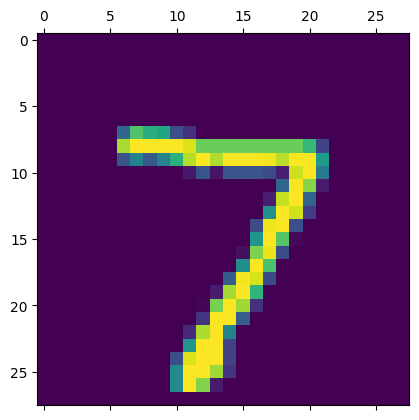

In [76]:
plt.matshow(X_test[0])

In [77]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


In [78]:
y_pred[0]

array([2.33729370e-02, 3.83097216e-07, 7.25023299e-02, 9.53435242e-01,
       3.72712105e-03, 1.36335209e-01, 1.93996902e-06, 9.99815702e-01,
       1.01218164e-01, 6.88167870e-01], dtype=float32)

In [79]:
# This is the max of all the predictions, so the highest probability of the prediction
np.argmax(y_pred[0])

np.int64(7)

In [80]:
# choose the highest probability of the prediction
y_pred_labels = [np.argmax(i) for i in y_pred]

In [81]:
y_pred_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [82]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

- 3 in 5 were correct here!

In [83]:
# A Matrix of the predictions and the actual values
    # The diagonal is the correct predictions
    # The rest is the incorrect predictions
tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    5,    6,    4,    1,    0],
       [   0, 1115,    2,    2,    0,    1,    4,    2,    9,    0],
       [   7,   10,  920,   15,   13,    4,   13,   11,   36,    3],
       [   4,    0,   19,  908,    1,   34,    3,   11,   23,    7],
       [   1,    1,    2,    2,  928,    0,   12,    4,    9,   23],
       [  10,    3,    2,   24,   12,  783,   18,    6,   28,    6],
       [  12,    3,    4,    1,    7,   10,  918,    2,    1,    0],
       [   1,    5,   23,    6,    7,    0,    0,  958,    4,   24],
       [   8,    7,    6,   20,    9,   25,   10,   12,  872,    5],
       [  11,    7,    1,   10,   40,    7,    0,   33,    8,  892]],
      dtype=int32)>

### To create a Hidden Layer

- The hidden layer will be something between the Input and the output 
- So we can create it with: 'keras.layers.Dense()', here we use Dense or another
- And then we put inside input of that, which will be the 784 pixels (base vector), since the hidden layer is between the input and the output and we can choose the quantity of hidden layers, for example a 100, for the activation there are many. 
- Then we just add an output layer to finish the NN

In [84]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # Hidden Layer
    keras.layers.Dense(10, activation='sigmoid') # Output Layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)


/Users/armindomatias/.pyenv/versions/rehab_houses/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8646 - loss: 0.4663
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9615 - loss: 0.1291
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9736 - loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9823 - loss: 0.0621
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9857 - loss: 0.0466


In [85]:
model.evaluate(X_test_flattened, y_test)

y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9723 - loss: 0.0931
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    0,    0,    0,    2,    1,    3,    0],
       [   0, 1126,    2,    1,    0,    1,    2,    0,    3,    0],
       [   6,    0, 1007,    2,    4,    0,    3,    3,    6,    1],
       [   2,    0,    8,  983,    0,    5,    0,    5,    1,    6],
       [   2,    0,    2,    0,  951,    1,    5,    1,    0,   20],
       [   3,    1,    0,    5,    2,  869,    5,    1,    3,    3],
       [   5,    3,    1,    1,    1,    4,  943,    0,    0,    0],
       [   2,    3,    9,    5,    2,    0,    0,  991,    1,   15],
       [  12,    0,    3,    9,    3,    5,    5,    4,  929,    4],
       [   3,    3,    0,    2,    5,    4,    0,    3,    1,  988]],
      dtype=int32)>

- Much better model with 97% accuracy by adding a new hidden layer